In [1]:
# !pip install numpy
# !pip install scikit-image
# !git clone https://github.com/hpg-cepetro/pymei.git
# !pip install pyqt5

Extrator de Estruturas
=============
Extrai arestas a partir de um dado sísmico

---

In [2]:
from __future__ import print_function
import numpy as np
from skimage.morphology import skeletonize

# Importa bibliotecas próprias
from utils import * 

# Configura o matplolib para plotar inline
# %matplotlib qt5
# %matplotlib notebook

Carregando o empilhamento ./reflexoes_migradas/solimoes_migrado.sgy
2206 traços:
 - CDP: [17 - 2223]
 - Amostras por traço (ns): 751
 - Tempo entre amostras (dt): 4.0 ms
Dimensões do dado 1: (751, 2206)

Tamanho da imagem (em polegadas): 30.64 x 10.43
Coordenadas:  x - [17.0, 2223.0], y - [0.0, 3.0]
Dimensão: (751, 2206)



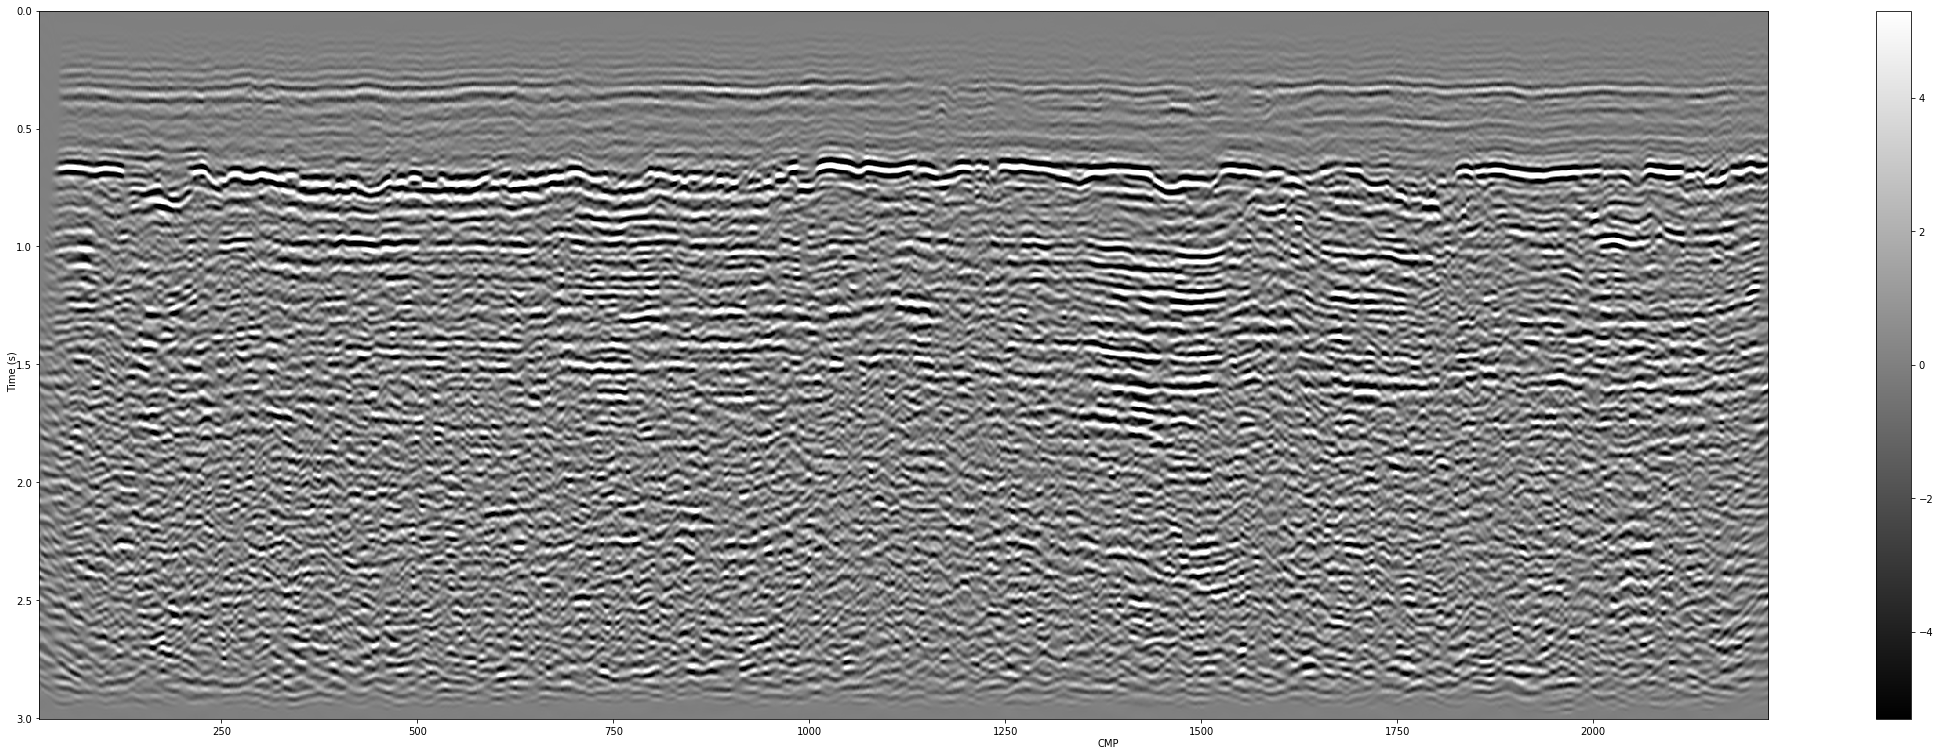

In [3]:
# Importa dado

# Definição de arquivos de entrada
stack_file = './reflexoes_migradas/solimoes_migrado.sgy'

# Definição plot
color = 'gray'
clip = 0.3

# Carrega dados
if not stack_file is None: 
    traces = load_traces(stack_file)
    stack_image = get_data_from_traces(traces)
    print("Dimensões do dado 1:", stack_image.shape)
    print()
    
multiple_event_viewer(stack_image, cdp_offset=traces[0].cdp, dt=traces[0].dt,
             clip_percent1=clip, color1=color)

Tamanho da imagem (em polegadas): 30.64 x 10.43
Coordenadas:  x - [17.0, 2223.0], y - [0.0, 3.0]
Dimensão: (751, 2206)



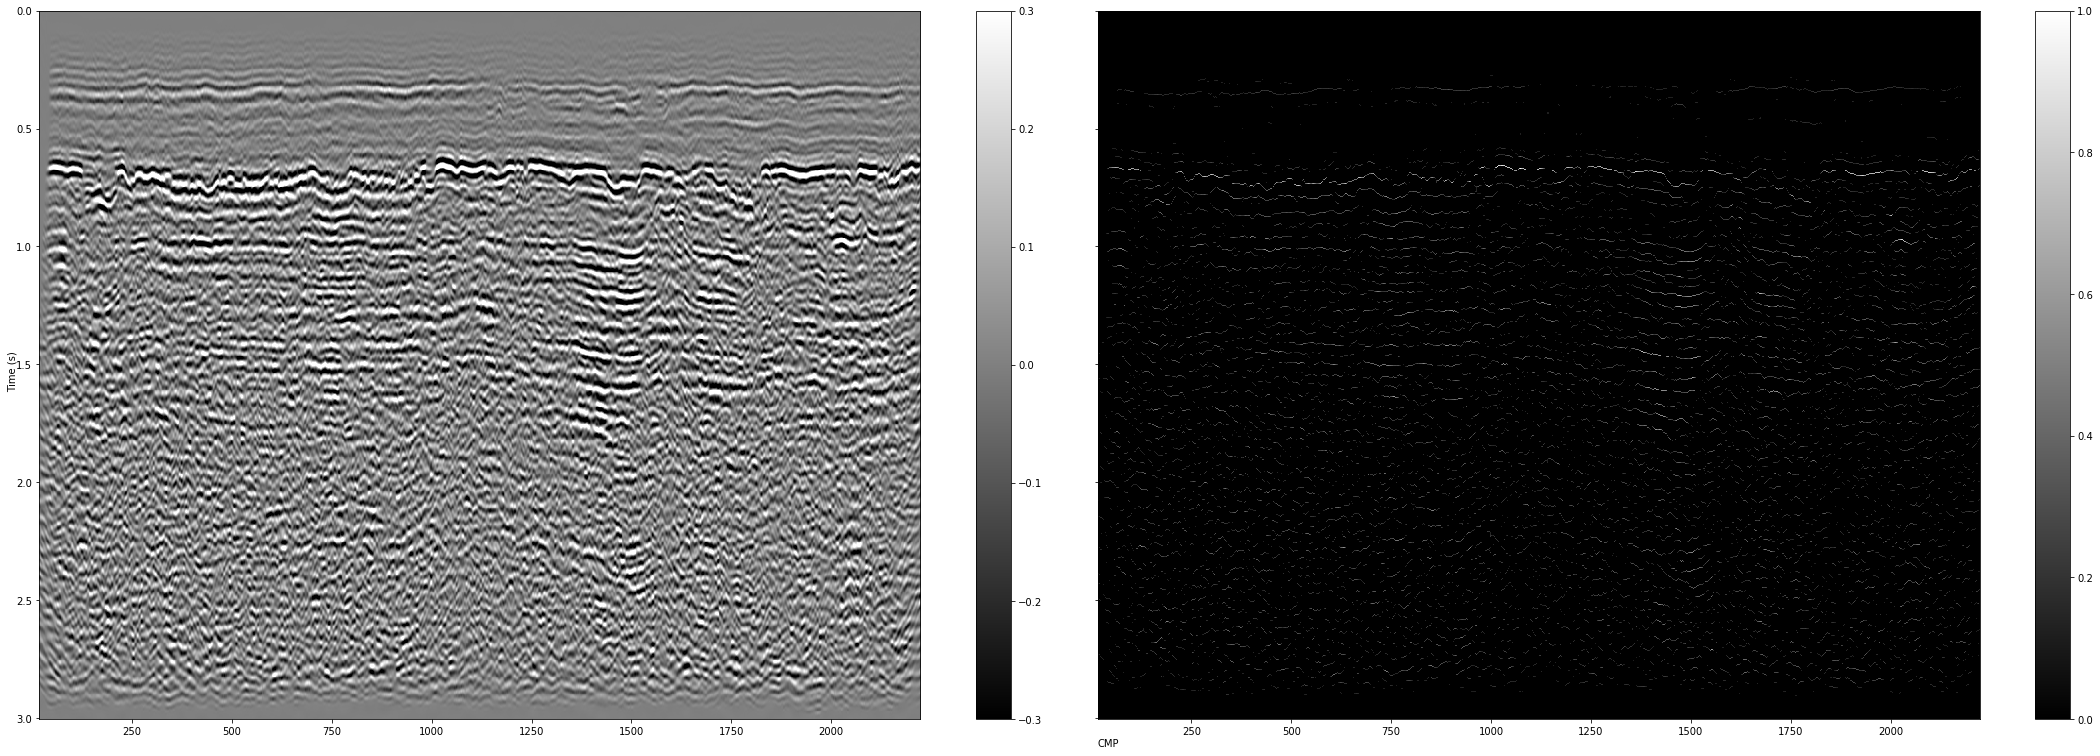

In [4]:
# Extrator de arestas

# Definição filtro
threshold = 0.12

# Definição plot
color = 'gray'
clip = 0.3

# Normaliza
vmax = np.abs((stack_image.min(), stack_image.max())).max()
stack_image /= vmax
    
# Torna dado binario
binary_image = stack_image.copy()
indices = np.where(binary_image < 0.0)
binary_image[indices] = 0.0
binary_image /= binary_image.max()
binary_image[binary_image < threshold] = 0.0
binary_image[binary_image >= threshold] = 1.0

# Aplica detector de arestas
binary_edges = skeletonize(binary_image)
gray_edges = binary_edges * stack_image

multiple_event_viewer(stack_image, gray_edges,
             vmin2=gray_edges.min(), vmax2=gray_edges.max(),
             cdp_offset=traces[0].cdp, dt=traces[0].dt,
             clip_percent1=clip, color1=color, color2=color)

In [5]:
def agc(stack_image, window_size, dt):
    window_size = int(np.floor(window_size/dt))
    agc_image = stack_image.copy()
    abs_image = np.abs(stack_image)
    vmax = abs_image.max()
    end = stack_image.shape[0]-window_size
    for i in range(end):
        means = np.mean(abs_image[i:i+window_size,:], axis=0)
        correct_factor = vmax / means
        agc_image[i,:] = stack_image[i,:] * correct_factor
    # Trata o final do dado
    #for i in range(stack_image.shape[0],end-1,-1):
    #    means = np.mean(abs_image[i-window_size:i,:], axis=0)
    #    agc_image[i-1,:] = stack_image[i-1,:] / means
    for i in range(end,stack_image.shape[0]):
        agc_image[i,:] = stack_image[i,:] / means
    
    return agc_image

In [6]:
agc_image = agc(stack_image, 0.1, traces[0].dt)

# Normaliza
vmax = np.abs(agc_image).max()
agc_image /= vmax

Tamanho da imagem (em polegadas): 30.64 x 10.43
Coordenadas:  x - [17.0, 2223.0], y - [0.0, 3.0]
Dimensão: (751, 2206)



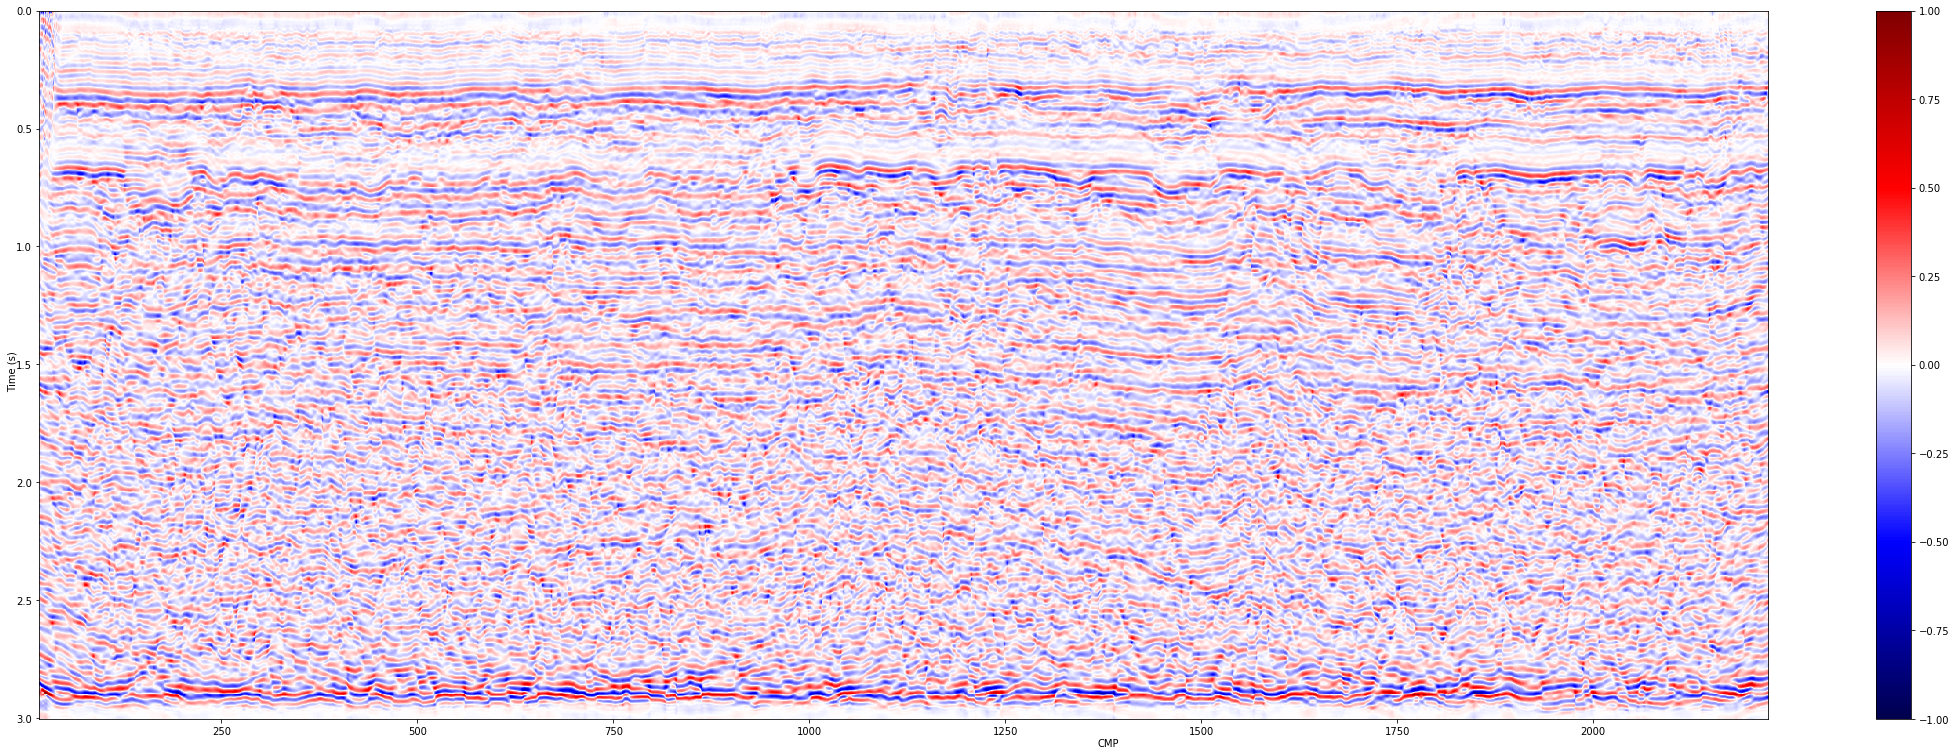

In [7]:
# Definição plot
color = 'seismic'
clip = 1.0

    
multiple_event_viewer(agc_image, cdp_offset=traces[0].cdp, dt=traces[0].dt,
             clip_percent1=clip, color1=color)

Tamanho da imagem (em polegadas): 30.64 x 10.43
Coordenadas:  x - [17.0, 2223.0], y - [0.0, 3.0]
Dimensão: (751, 2206)



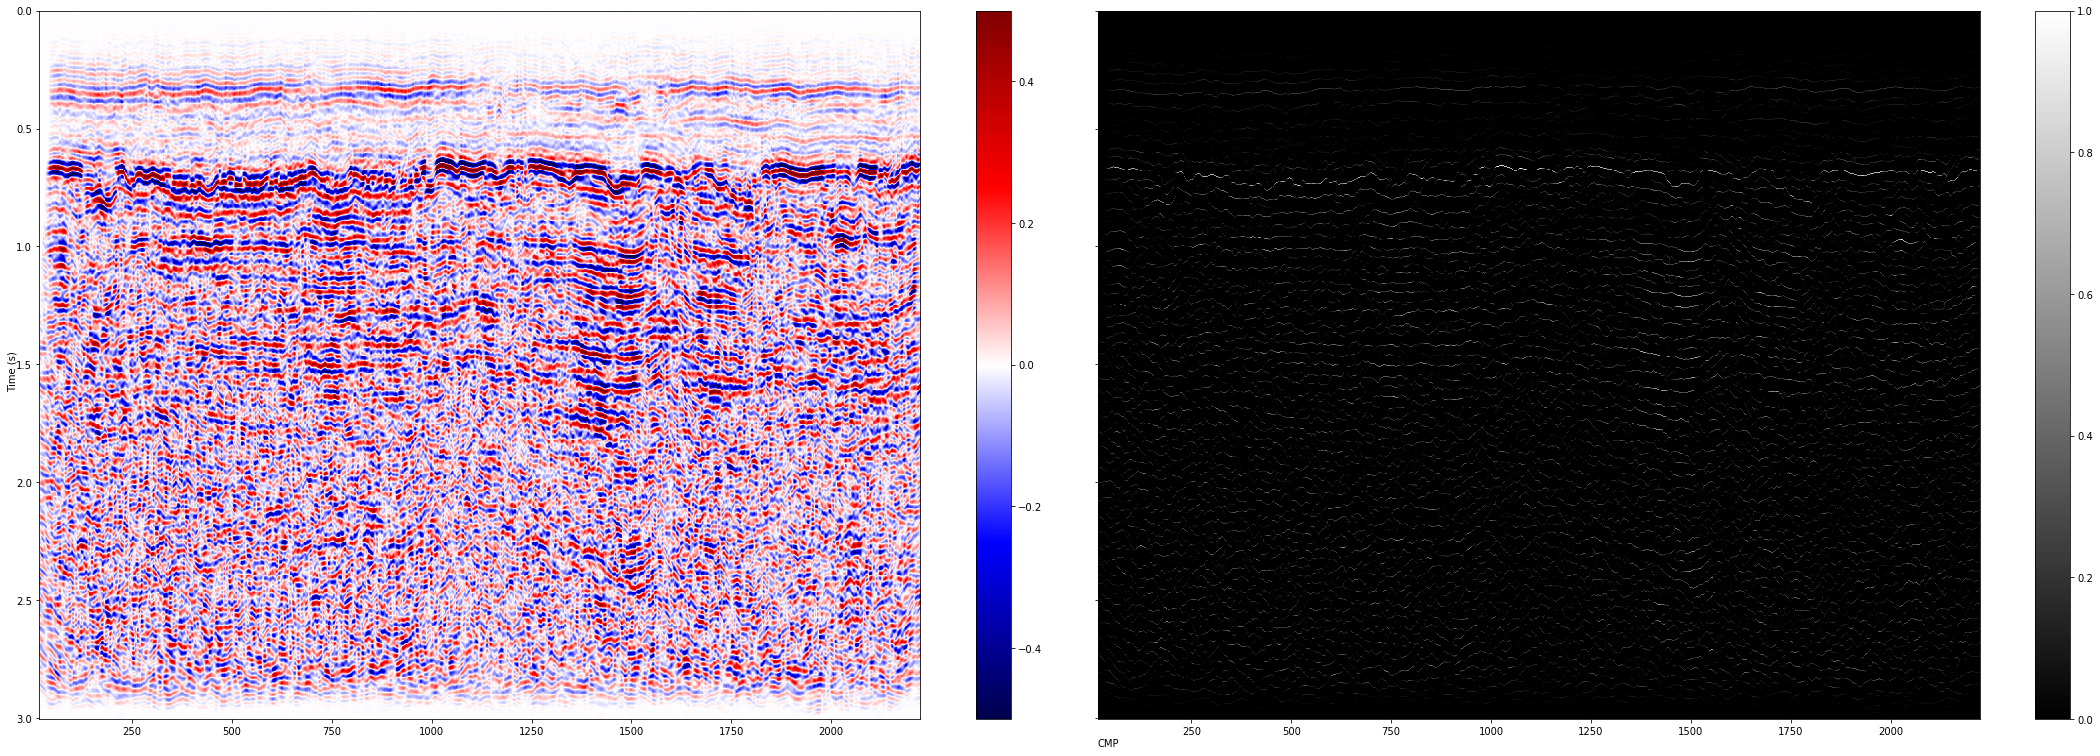

In [8]:
# Extrator de arestas

# Definição filtro
threshold = 0.02

# Definição plot
color = 'seismic'
clip = 0.5

# Normaliza
vmax = np.abs((stack_image.min(), stack_image.max())).max()
stack_image /= vmax
    
# Torna dado binario
binary_image = agc_image.copy()
indices = np.where(binary_image < 0.0)
binary_image[indices] = 0.0
binary_image /= binary_image.max()
binary_image[binary_image < threshold] = 0.0
binary_image[binary_image >= threshold] = 1.0

# Aplica detector de arestas
binary_edges = skeletonize(binary_image)
gray_edges = binary_edges * stack_image

multiple_event_viewer(stack_image, gray_edges,
             vmin2=gray_edges.min(), vmax2=gray_edges.max(),
             cdp_offset=traces[0].cdp, dt=traces[0].dt,
             clip_percent1=clip, color1=color, color2='gray')

Tamanho da imagem (em polegadas): 30.64 x 10.43
Coordenadas:  x - [17.0, 2223.0], y - [0.0, 3.0]
Dimensão: (751, 2206)



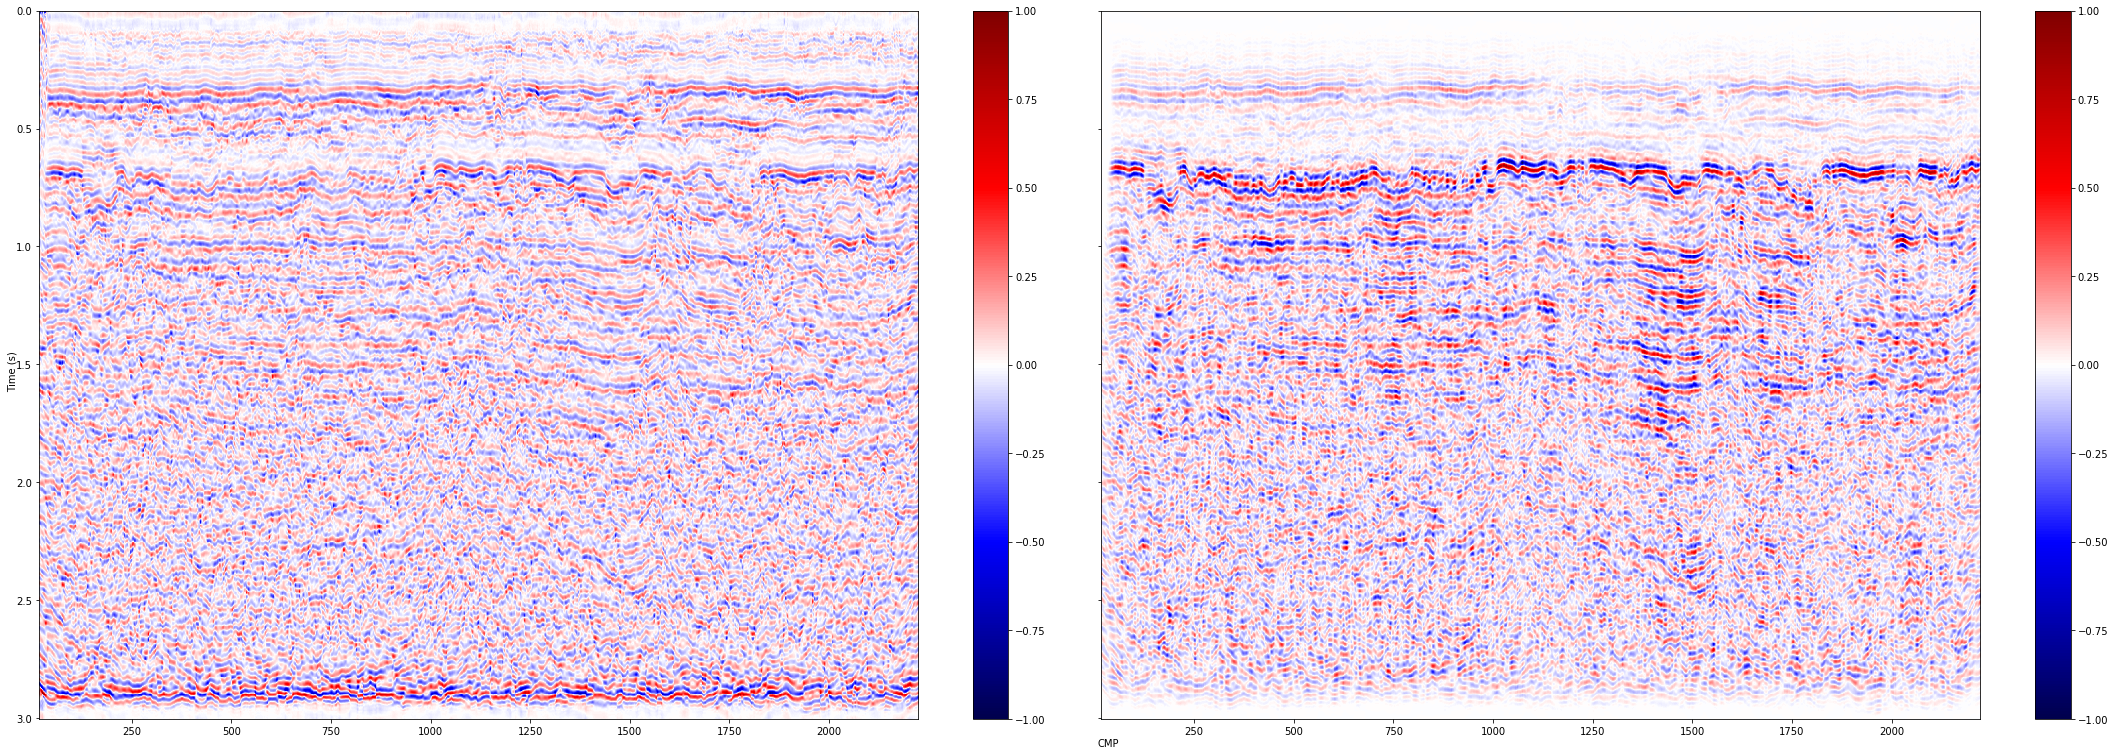

In [9]:
# Definição plot
color = 'seismic'
clip = 1.0

vmax = np.abs(stack_image).max()
stack_image /= vmax
    
multiple_event_viewer(agc_image, stack_image, cdp_offset=traces[0].cdp, dt=traces[0].dt,
             clip_percent1=clip, color1=color, clip_percent2=clip, color2=color)

In [10]:
# Salva dados
save_file = 'estruturas/solimoes_edges.pickle'

pickle_data(save_file, [gray_edges], ['edges'])

Dado persistido em estruturas/solimoes_edges.pickle
